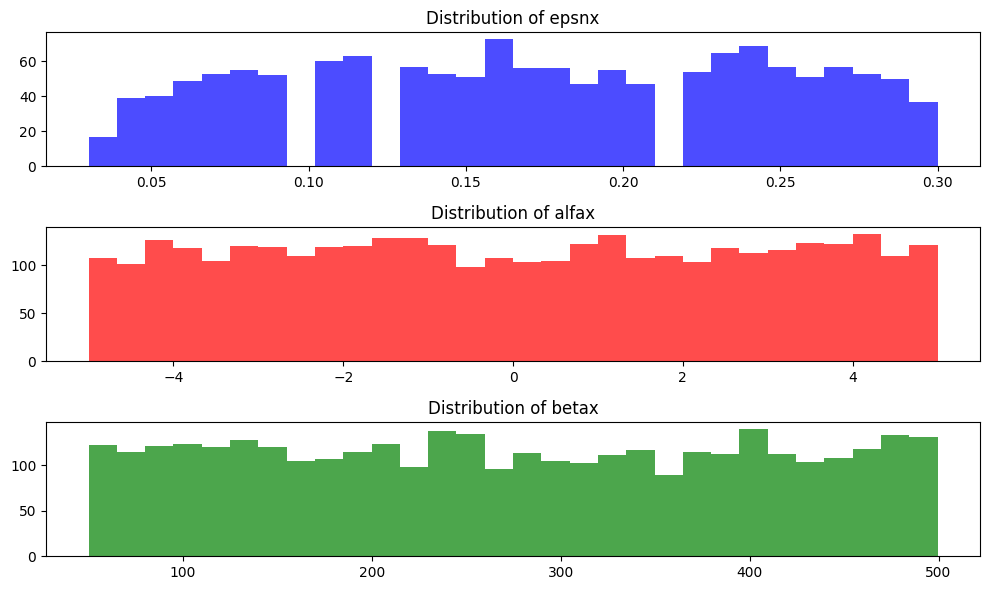

In [8]:
import mysql.connector
import re
import matplotlib.pyplot as plt

# Define regex pattern
pattern = r"epsnx(-?[\d.]+)_alfax(-?[\d.]+)_betax(-?[\d.]+)_epsny(-?[\d.]+)_alfay(-?[\d.]+)_betay(-?[\d.]+)_epsnz(-?[\d.]+)_alfaz(-?[\d.]+)_betaz(-?[\d.]+)"

# Connect to the MySQL server
conn = mysql.connector.connect(
    host='srv395.hstgr.io',
    port='3306',
    user='u641848469_iank',
    password='VPCBwkO68!!nCOXa2Yv4',
    database='u641848469_argonneimages',
    connect_timeout=600  # Set connection timeout to 10 minutes
)

# Create a cursor
cursor = conn.cursor()

# Execute query to fetch filenames
cursor.execute("SELECT filename FROM filenames")

# Fetch filenames
filenames = cursor.fetchall()

# List to store parameters
epsnx_values = []
alfax_values = []
betax_values = []

# Iterate over each filename
for filename in filenames:
    # Apply regex pattern
    match = re.match(pattern, filename[0])
    if match:
        # If match is found, store parameters
        epsnx, alfax, betax, _, _, _, _, _, _ = map(float, match.groups())
        if epsnx != 0.10:
            epsnx_values.append(epsnx)
        alfax_values.append(alfax)
        betax_values.append(betax)

# Close connection
conn.close()

# Now, we can plot the distribution of the parameters
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.hist(epsnx_values, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of epsnx')

plt.subplot(3,1,2)
plt.hist(alfax_values, bins=30, color='red', alpha=0.7)
plt.title('Distribution of alfax')

plt.subplot(3,1,3)
plt.hist(betax_values, bins=30, color='green', alpha=0.7)
plt.title('Distribution of betax')

plt.tight_layout()
plt.show()


In [1]:
import os
import mysql.connector

# Connect to the database
cnx = mysql.connector.connect(
        host='srv395.hstgr.io',
        port='3306',
        user='u641848469_iank',
        password='VPCBwkO68!!nCOXa2Yv4',
        database='u641848469_argonneimages',
)

# Create a cursor
cursor = cnx.cursor()

# Specify the folder path
folder_path = 'E://data/'

# Get a list of subfolder names in the folder
subfolders = next(os.walk(folder_path))[1]

# Check if every subfolder name exists in the database
for subfolder in subfolders:
    query = "SELECT filename FROM filenames WHERE filename = %s"
    cursor.execute(query, (subfolder,))
    result = cursor.fetchone()
    if result:
        pass
    else:
        print(f"Subfolder '{subfolder}' does not exist in the database")
        insert_query = "INSERT INTO filenames (filename) VALUES (%s)"
        cursor.execute(insert_query, (subfolder,))
        cnx.commit()

# Close the cursor and connection
cursor.close()
cnx.close()


In [2]:
import os
import mysql.connector

# Connect to the database
cnx = mysql.connector.connect(
        host='srv395.hstgr.io',
        port='3306',
        user='u641848469_iank',
        password='VPCBwkO68!!nCOXa2Yv4',
        database='u641848469_argonneimages',
)

# Create a cursor
cursor = cnx.cursor()

# Specify the folder path
folder_path = 'E://data/'

# Get a list of subfolder names in the folder
subfolders = next(os.walk(folder_path))[1]

# Retrieve all rows from the database table
query = "SELECT filename FROM filenames"
cursor.execute(query)
rows = cursor.fetchall()

# Check if each row in the database exists as a subfolder
for row in rows:
    filename = row[0]
    if filename in subfolders:
        pass
    else:
        delete_query = "DELETE FROM filenames WHERE filename = %s"
        cursor.execute(delete_query, (filename,))
        cnx.commit()
        print(f"Deleted row with filename '{filename}' from the database")


# Close the cursor and connection
cursor.close()
cnx.close()


In [3]:
import os

# Define the directory to start from
root_dir = "E://data/"

# Walk through all directories and files in the root directory
for dir_name, sub_dir_list, file_list in os.walk(root_dir):
    for file_name in file_list:
        # If the file is 'coord.out', check its size
        if file_name == 'coord.out':
            file_path = os.path.join(dir_name, file_name)
            file_size_MB = os.path.getsize(file_path) / (1024 * 1024)  # Convert to megabytes
            if file_size_MB < 50:
                print(f'File "{file_path}" is smaller than 50MB.')
